# Movie Recommendation System - Hulu
![3bc2f36497f3f66074ba25515128e0d8](https://github.com/user-attachments/assets/a07857a2-3bff-4ace-b509-b20254ed3717)

## Introduction
In today’s highly competitive streaming landscape, personalized movie recommendations play a crucial role in user engagement and retention. Hulu, which holds 11% of the market share in the streaming industry, is looking to upgrade its current movie recommendation algorithm. The aim of this project is to develop a machine learning model that provides users with the top 5 movie recommendations based on their previous ratings of other movies.

Our audience for this project is the Hulu Technology Team, headed by the CTO of Hulu.This project will explore an enhanced algorithm to improve the quality of recommendations for Hulu subscribers.
## Main Objective:

- To build a movie recommendation model that can provide the top 5 movie recommendations to a user based on their previous ratings. The model is aimed at enhancing Hulu's current recommendation system.
  
## Data Understanding
The dataset used in this project was sourced from [Grouplens](https://grouplens.org/datasets/movielens/100k/), utilizing information from IMDb and TMDb. The data contains over 100,000 movie ratings provided by 610 different users for about 9,700 movies, collected over a time span from 1996 to 2018. Each user has reviewed at least 20 different movies.

While the full dataset consists of approximately 1.9 million ratings, this project focuses on a subset of 100,000 ratings due to time constraints.

### Key Features of the Dataset:
- User ID: A unique identifier for each user.
- Movie ID: A unique identifier for each movie.
- Ratings: A score from 0.5 to 5.0 given by a user for a movie.
- Timestamp: The time when the rating was provided.
- Movie Metadata: Information about the movies, such as title and genres.
This data is crucial for building a collaborative filtering model that can predict which movies a user is likely to rate highly based on the behavior of similar users.


## Target accuracy threshold **(90/%)**

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 1.Data Exploration and  Cleaning

In [6]:
ratings_path = 'ratings.csv'
movies_path = 'movies.csv'
tags_path = 'tags.csv'


# Load the datasets
rt_df = pd.read_csv(ratings_path)
mv_df = pd.read_csv(movies_path)
tg_df = pd.read_csv(tags_path)

In [7]:
# Preview the shape of the dataset
print('Dataframe shape {}'.format(tg_df.shape))
print('Dataframe shape {}'.format(mv_df.shape))
print('Dataframe shape {}'.format(rt_df.shape))


Dataframe shape (3683, 4)
Dataframe shape (9742, 3)
Dataframe shape (100836, 4)


### Movie Dataset

In [8]:
# Check basic information about the movies dataset
print("Movies Data Information:")
mv_df.info()

# Check for duplicates in the 'movieId' column
duplicates = mv_df[mv_df.duplicated(subset='movieId')]
print(f"\nNumber of duplicate entries in 'movieId': {len(duplicates)}")

# Display duplicates, if any
if not duplicates.empty:
    print("\nDuplicate entries in the movies dataset:")
    display(duplicates)

# Check for missing values in the movies dataset
print("\nMissing values in Movies Data:")
print(mv_df.isnull().sum())

# Display a summary of the movies dataset
print("\nMovies Data Summary:")
display(mv_df.describe(include='all'))

# Preview the first few rows of the dataset
print("\nMovies Data Preview:")
display(mv_df.head())


Movies Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB

Number of duplicate entries in 'movieId': 0

Missing values in Movies Data:
movieId    0
title      0
genres     0
dtype: int64

Movies Data Summary:


,movieId,title,genres
count,9742.000000,9742,9742
unique,NaN,9737,951
top,NaN,Emma (1996),Drama
freq,NaN,2,1053
mean,42200.353623,NaN,NaN
std,52160.494854,NaN,NaN
min,1.000000,NaN,NaN
25%,3248.250000,NaN,NaN
50%,7300.000000,NaN,NaN
75%,76232.000000,NaN,NaN



Movies Data Preview:


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


The movies dataset has 9,742 entries with columns: movieId, title, and genres. There are no missing values or duplicate movieId entries, ensuring each movie is uniquely identified. The title column has a few duplicates, potentially due to different versions of the same movie. The genres column contains 951 unique genre combinations, with "Drama" being the most common. Overall, the dataset is clean, with appropriate data types, making it ready for use in the recommendation system.

### Ratings Dataset

In [9]:
# Check basic information about the ratings dataset
print("Ratings Data Information:")
rt_df.info()

# Check for duplicates in the ratings dataset (based on 'userId' and 'movieId' combination)
duplicates = rt_df[rt_df.duplicated(subset=['userId', 'movieId'])]
print(f"\nNumber of duplicate entries in 'userId' and 'movieId': {len(duplicates)}")

# Display duplicates, if any
if not duplicates.empty:
    print("\nDuplicate entries in the ratings dataset:")
    display(duplicates)

# Check for missing values in the ratings dataset
print("\nMissing values in Ratings Data:")
print(rt_df.isnull().sum())

# Display a summary of the ratings dataset
print("\nRatings Data Summary:")
display(rt_df.describe())

# Preview the first few rows of the dataset
print("\nRatings Data Preview:")
display(rt_df.head())


Ratings Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB

Number of duplicate entries in 'userId' and 'movieId': 0

Missing values in Ratings Data:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Ratings Data Summary:


,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09



Ratings Data Preview:


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


The ratings dataset contains information on user ratings for movies, with columns: userId, movieId, rating, and timestamp. There are no missing values in the dataset, and it includes unique combinations of userId and movieId, indicating no duplicate ratings for the same movie by a user. The rating column has a range that provides insight into user preferences. Overall, the dataset is clean and well-structured, ready for further analysis in building the recommendation model.

## Tags Dataset

In [10]:
# Check basic information about the tags dataset
print("Tags Data Information:")
tg_df.info()

# Check for duplicates in the 'userId' and 'movieId' combination
duplicates = tg_df[tg_df.duplicated(subset=['userId', 'movieId', 'tag'])]
print(f"\nNumber of duplicate entries in 'userId', 'movieId', and 'tag': {len(duplicates)}")

# Display duplicates, if any
if not duplicates.empty:
    print("\nDuplicate entries in the tags dataset:")
    display(duplicates)

# Check for missing values in the tags dataset
print("\nMissing values in Tags Data:")
print(tg_df.isnull().sum())

# Display a summary of the tags dataset
print("\nTags Data Summary:")
display(tg_df.describe(include='all'))

# Preview the first few rows of the dataset
print("\nTags Data Preview:")
display(tg_df.head())


Tags Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB

Number of duplicate entries in 'userId', 'movieId', and 'tag': 0

Missing values in Tags Data:
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

Tags Data Summary:


,userId,movieId,tag,timestamp
count,3683.000000,3683.000000,3683,3.683000e+03
unique,NaN,NaN,1589,NaN
top,NaN,NaN,In Netflix queue,NaN
freq,NaN,NaN,131,NaN
mean,431.149335,27252.013576,NaN,1.320032e+09
std,158.472553,43490.558803,NaN,1.721025e+08
min,2.000000,1.000000,NaN,1.137179e+09
25%,424.000000,1262.500000,NaN,1.137521e+09
50%,474.000000,4454.000000,NaN,1.269833e+09
75%,477.000000,39263.000000,NaN,1.498457e+09



Tags Data Preview:


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


The tags dataset contains 3,683 entries with columns: userId, movieId, tag, and timestamp. There are no missing values or duplicate entries, ensuring the uniqueness of each tagging instance. The dataset features 1,589 unique tags, with "In Netflix queue" being the most common. The wide range of values in movieId and userId indicates diverse tagging behavior. Overall, the dataset is well-structured and ready for use in the recommendation model.

# Merging the Datasets

In [11]:
# Merge mv_df and tg_df on 'movieId'
merged_df = pd.merge(mv_df, tg_df, on='movieId', how='inner')

# Merge the result with rt_df on 'movieId'
merged_df = pd.merge(merged_df, rt_df, on='movieId', how='inner')

# Display the resulting DataFrame
merged_df.head()


,movieId,title,genres,userId_x,tag,timestamp_x,userId_y,rating,timestamp_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764,17,4.5,1305696483


In [12]:
merged_df.shape

(233213, 9)

In [13]:
# Creating a class for exploring and analyzing Pandas DataFrames.
class MovieDataExplorer:
    def __init__(self, dataframe):
        """
        Initialize the MovieDataExplorer class with a dataset.
        :param dataframe: Pandas DataFrame
        """
        self.dataframe = dataframe
        
    def view_head(self, rows=5):
        """
        Display the first few rows of the dataset.
        :return: Pandas DataFrame showing the head of the dataset
        """
        return self.dataframe.head(rows)
    
    def view_info(self):
        """
        Display information about the dataset (data types, memory usage, etc.).
        """
        return self.dataframe.info()
    
    def view_describe(self):
        """
        Generate descriptive statistics of the dataset (count, mean, etc.).
        :return: Pandas DataFrame with descriptive statistics
        """
        return self.dataframe.describe()


In [14]:
# Instantiating the MovieDataExplorer class
movie_explorer = MovieDataExplorer(merged_df)

# Check the head of the dataset
print("Head of the dataset:")
print(movie_explorer.view_head())

# Check dataset info
print("\nDataset info:")
movie_explorer.view_info()

# Check dataset description
print("\nDataset statistics:")
print(movie_explorer.view_describe())


Head of the dataset:
   movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
3        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
4        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   

   userId_x    tag  timestamp_x  userId_y  rating  timestamp_y  
0       336  pixar   1139045764         1     4.0    964982703  
1       336  pixar   1139045764         5     4.0    847434962  
2       336  pixar   1139045764         7     4.5   1106635946  
3       336  pixar   1139045764        15     2.5   1510577970  
4       336  pixar   1139045764        17     4.5   1305696483  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233213 entries, 0 to 233212
Data columns (total 9 columns):
 

## Data Cleaning

In [15]:
# Checking for missing values in the dataset
merged_df.isnull().sum()

movieId        0
title          0
genres         0
userId_x       0
tag            0
timestamp_x    0
userId_y       0
rating         0
timestamp_y    0
dtype: int64

In [18]:
import re

# Function to extract the year from the title
def extract_movie_release_year(title):
    match = re.search(r'\((\d{4})\)', title)
    return match.group(1) if match else None

# Apply the function to create a new 'release_year' column
merged_df['release_year'] = merged_df['title'].apply(extract_movie_release_year)

# Remove the year from the 'title' column
merged_df['title'] = merged_df['title'].str.replace(r'\s*\(\d{4}\)', '', regex=True)

# Display the updated DataFrame
merged_df.head()




,movieId,title,genres,userId_x,tag,timestamp_x,userId_y,rating,timestamp_y,release_year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764,1,4.0,964982703,1995
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764,5,4.0,847434962,1995
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764,7,4.5,1106635946,1995
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764,15,2.5,1510577970,1995
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764,17,4.5,1305696483,1995


In [19]:
# Split the genres column into a list of genres and explode the list into separate rows
merged_df['genres'] = merged_df['genres'].str.split('|')
merged_df = merged_df.explode('genres')

# Display the updated DataFrame
merged_df.head()


,movieId,title,genres,userId_x,tag,timestamp_x,userId_y,rating,timestamp_y,release_year
0,1,Toy Story,Adventure,336,pixar,1139045764,1,4.0,964982703,1995
0,1,Toy Story,Animation,336,pixar,1139045764,1,4.0,964982703,1995
0,1,Toy Story,Children,336,pixar,1139045764,1,4.0,964982703,1995
0,1,Toy Story,Comedy,336,pixar,1139045764,1,4.0,964982703,1995
0,1,Toy Story,Fantasy,336,pixar,1139045764,1,4.0,964982703,1995


In [20]:
# Check for null values in the 'genres' column
null_values_in_genres = merged_df['genres'].isnull()

# Display the rows where null values are present in the 'genres' column
rows_with_null_values = merged_df[null_values_in_genres]
print("Rows with null values in the 'genres' column:")
print(rows_with_null_values)


Rows with null values in the 'genres' column:
Empty DataFrame
Columns: [movieId, title, genres, userId_x, tag, timestamp_x, userId_y, rating, timestamp_y, release_year]
Index: []


In [21]:
# Converting 'release_year' to date-time format
merged_df['release_year'] = pd.to_datetime(merged_df['release_year'], format='%Y')

# Keeping only the year
merged_df['release_year'] = merged_df['release_year'].dt.year

# Previewing the changes
merged_df.head()


,movieId,title,genres,userId_x,tag,timestamp_x,userId_y,rating,timestamp_y,release_year
0,1,Toy Story,Adventure,336,pixar,1139045764,1,4.0,964982703,1995.0
0,1,Toy Story,Animation,336,pixar,1139045764,1,4.0,964982703,1995.0
0,1,Toy Story,Children,336,pixar,1139045764,1,4.0,964982703,1995.0
0,1,Toy Story,Comedy,336,pixar,1139045764,1,4.0,964982703,1995.0
0,1,Toy Story,Fantasy,336,pixar,1139045764,1,4.0,964982703,1995.0


# 2. Exploratory Data Analysis (EDA)

## Univariate Analysis

In [22]:
# checking summary stats for the dataset
merged_df.describe().T

,count,mean,std,min,25%,50%,75%,max
movieId,765271.0,1.298585e+04,2.825240e+04,1.000000e+00,2.960000e+02,1.035000e+03,4.878000e+03,1.935650e+05
userId_x,765271.0,4.797523e+02,1.543547e+02,2.000000e+00,4.740000e+02,4.770000e+02,5.990000e+02,6.100000e+02
timestamp_x,765271.0,1.399591e+09,1.467196e+08,1.137179e+09,1.262796e+09,1.498456e+09,1.498457e+09,1.537099e+09
userId_y,765271.0,3.083080e+02,1.779265e+02,1.000000e+00,1.560000e+02,3.080000e+02,4.540000e+02,6.100000e+02
rating,765271.0,3.993245e+00,9.662002e-01,5.000000e-01,3.500000e+00,4.000000e+00,5.000000e+00,5.000000e+00
timestamp_y,765271.0,1.215775e+09,2.275019e+08,8.281246e+08,1.013395e+09,1.221158e+09,1.446572e+09,1.537799e+09
release_year,765268.0,1.995209e+03,1.096203e+01,1.921000e+03,1.994000e+03,1.994000e+03,2.001000e+03,2.018000e+03


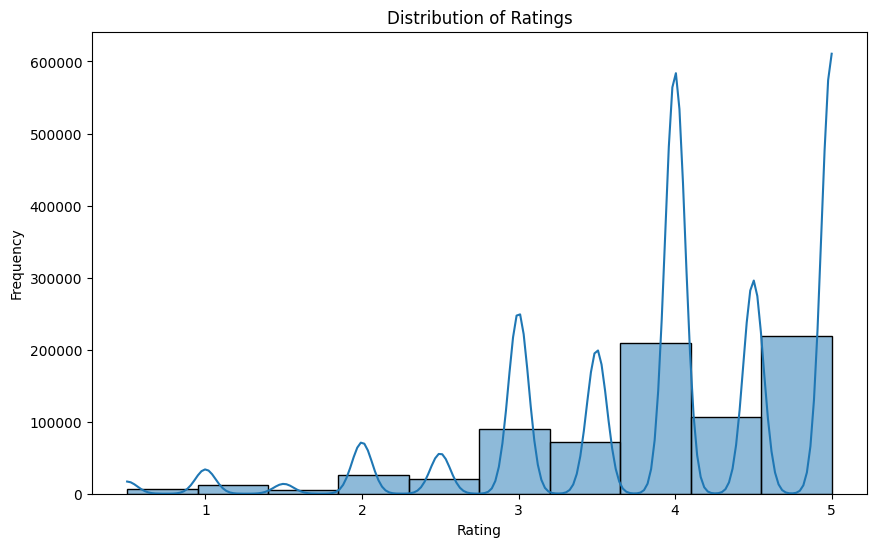

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


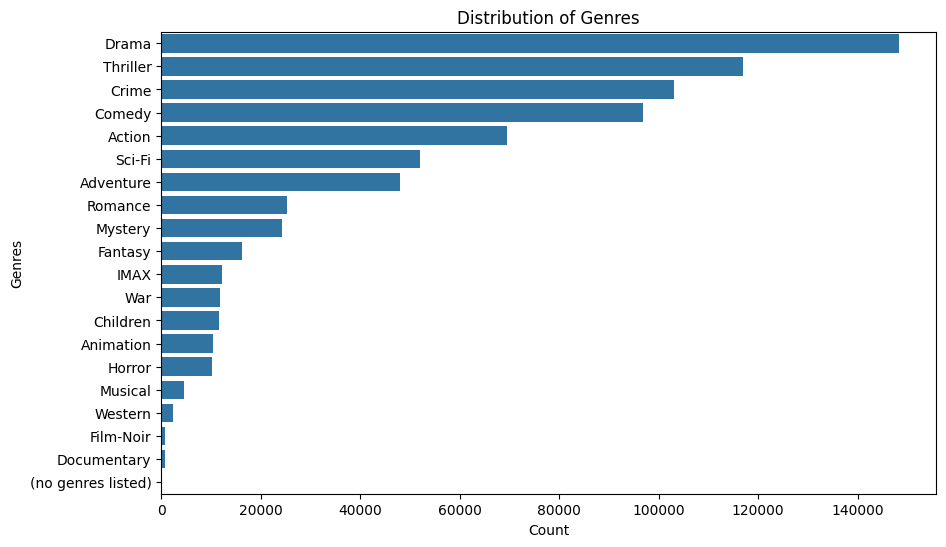

In [25]:
# Count of different genres
plt.figure(figsize=(10, 6))
genres_count = merged_df['genres'].value_counts()
sns.barplot(y=genres_count.index, x=genres_count.values)
plt.title('Distribution of Genres')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.show()


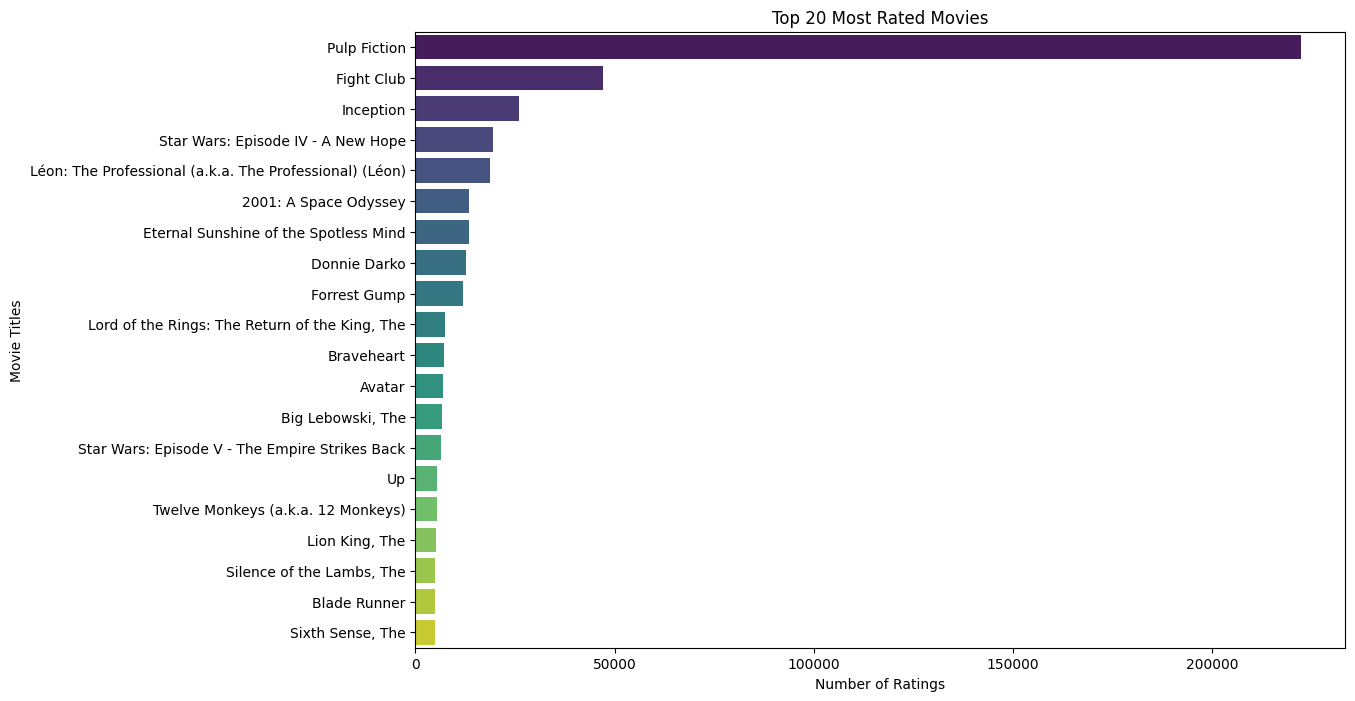

In [26]:
# Top 20 most rated movies
plt.figure(figsize=(12, 8))
top_20_movies = merged_df['title'].value_counts().head(20)
sns.barplot(y=top_20_movies.index, x=top_20_movies.values, palette='viridis')
plt.title('Top 20 Most Rated Movies')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Titles')
plt.show()


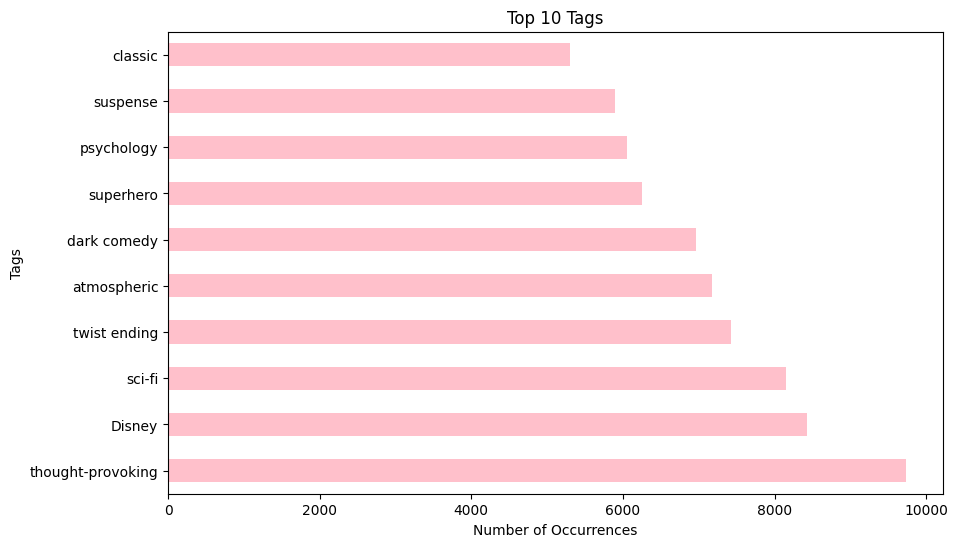

In [27]:
# Plot a bar chart for the top tags
tag_counts = merged_df['tag'].value_counts()
top_tags = tag_counts.head(10)

plt.figure(figsize=(10, 6))
top_tags.plot(kind='barh', color='pink')
plt.title('Top 10 Tags')
plt.xlabel('Number of Occurrences')
plt.ylabel('Tags')
plt.show()


In [28]:
def count_genres(merged_movie_df):
    """
    Find and count genres in the merged movie DataFrame.
    """
    genre_count_dict = {}  # Dictionary to store genre counts

    for genre in merged_movie_df['genres']:
        if isinstance(genre, str):  # Ensure genre is a string before splitting
            words = genre.split('|')
            for word in words:
                genre_count_dict[word] = genre_count_dict.get(word, 0) + 1

    return genre_count_dict

# Usage
genre_counts = count_genres(merged_df)
genre_counts


{'Adventure': 47939,
 'Animation': 10466,
 'Children': 11595,
 'Comedy': 96901,
 'Fantasy': 16220,
 'Romance': 25344,
 'Drama': 148389,
 'Crime': 103102,
 'Thriller': 116891,
 'Horror': 10199,
 'Mystery': 24352,
 'Sci-Fi': 51977,
 'War': 11737,
 'Musical': 4496,
 'Action': 69549,
 'Documentary': 711,
 'IMAX': 12263,
 'Western': 2354,
 'Film-Noir': 783,
 '(no genres listed)': 3}

## Bivariate Analysis

In [29]:
# Merging the ratings and movies DataFrames
merged_dataset = pd.merge(rt_df, mv_df, on='movieId', how='left')


In [30]:
# Count how many people rated each movie
ratings_per_movie = merged_dataset.groupby('title')['userId'].count().reset_index(name='num_ratings')

# Only keep movies that got at least a hundred ratings
top_rated_movies = ratings_per_movie[ratings_per_movie['num_ratings'] >= 100]

top_rated_movies



,title,num_ratings
74,2001: A Space Odyssey (1968),109
207,Ace Ventura: Pet Detective (1994),161
298,Aladdin (1992),183
327,Alien (1979),146
333,Aliens (1986),126
...,...,...
9120,V for Vendetta (2006),100
9215,WALL·E (2008),104
9298,Waterworld (1995),115
9485,Willy Wonka & the Chocolate Factory (1971),119


In [32]:
# Combine the original data with only the popular movies
popular_movies_dataset = pd.merge(merged_dataset, top_rated_movies, on='title', how='inner')

# Find the average rating for each movie
movie_average_ratings = popular_movies_dataset.groupby('title')['rating'].mean().reset_index()

# Add the average rating column to the top_rated_movies DataFrame
top_rated_movies = pd.merge(top_rated_movies, movie_average_ratings, on='title', how='left')

top_rated_movies



,title,num_ratings,rating
0,2001: A Space Odyssey (1968),109,3.894495
1,Ace Ventura: Pet Detective (1994),161,3.040373
2,Aladdin (1992),183,3.792350
3,Alien (1979),146,3.969178
4,Aliens (1986),126,3.964286
...,...,...,...
133,V for Vendetta (2006),100,3.885000
134,WALL·E (2008),104,4.057692
135,Waterworld (1995),115,2.913043
136,Willy Wonka & the Chocolate Factory (1971),119,3.873950


In [34]:
# Create a special combined score by considering both the average rating and the number of ratings
popular_movies_dataset['combined_metric'] = popular_movies_dataset['rating'] * (popular_movies_dataset['num_ratings'].apply(lambda x: min(1, x / 100)))
# Sort the movies based on the combined score from highest to lowest
ranked_movies = popular_movies_dataset.groupby('title')['combined_metric'].sum().reset_index()
ranked_movies = ranked_movies.sort_values(by='combined_metric', ascending=False)

ranked_movies


,title,combined_metric
106,"Shawshank Redemption, The (1994)",1404.0
50,Forrest Gump (1994),1370.0
99,Pulp Fiction (1994),1288.5
84,"Matrix, The (1999)",1165.5
109,"Silence of the Lambs, The (1991)",1161.0
...,...,...
95,Outbreak (1995),346.0
32,Clueless (1995),342.5
92,"Net, The (1995)",340.5
135,Waterworld (1995),335.0


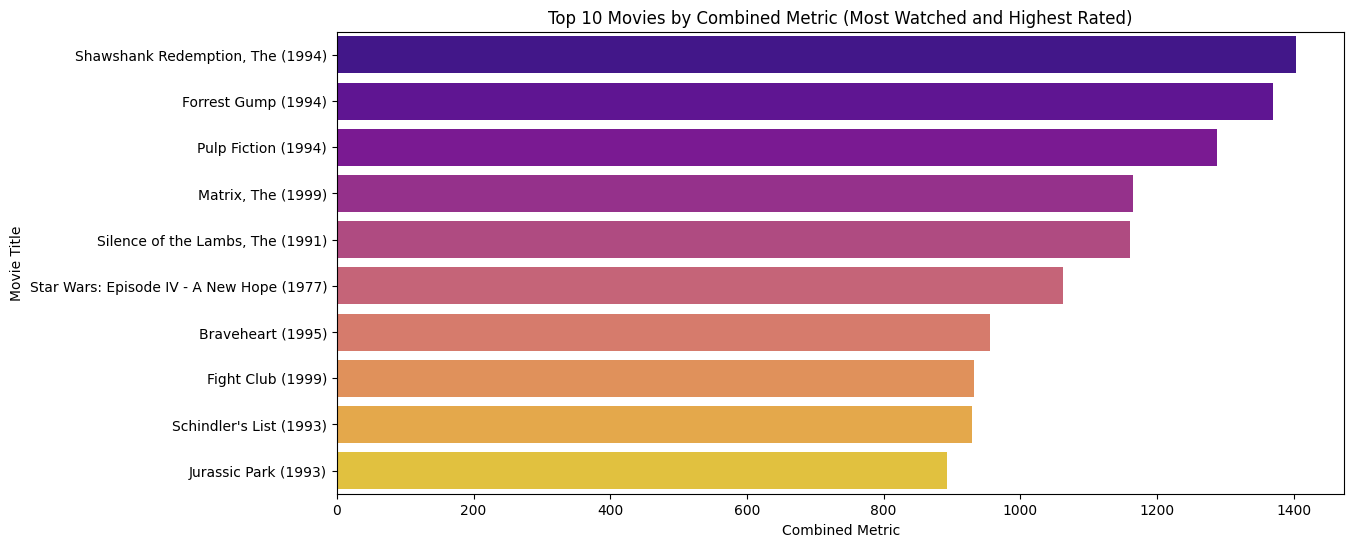

In [35]:
# Cool bar plot to show the top 10 movies with the best combined score
plt.figure(figsize=(13, 6))
sns.barplot(x="combined_metric", y="title", data=ranked_movies.head(10), palette="plasma")
plt.title("Top 10 Movies by Combined Metric (Most Watched and Highest Rated)")
plt.xlabel("Combined Metric")
plt.ylabel("Movie Title")
plt.show()


### Most popular movies by genre

In [38]:
# Merge datasets based on movieId
merged_movie_ratings = pd.merge(rt_df, mv_df, on='movieId')

# Count how many ratings each movie has
movie_ratings_count = merged_movie_ratings.groupby('title')['userId'].count().reset_index(name='num_ratings')

# Filter movies with more than 100 ratings
movies_with_over_100_ratings = movie_ratings_count[movie_ratings_count['num_ratings'] > 100]

# Select movies with over 100 ratings from the merged DataFrame
filtered_movies_dataset = merged_movie_ratings[merged_movie_ratings['title'].isin(movies_with_over_100_ratings['title'])]

# Function to get the most popular movies by genre
def get_most_popular_by_genre(genre, top_n=5):
    # Filter movies with over 100 ratings by genre
    genre_movies = filtered_movies_dataset[filtered_movies_dataset['genres'].str.contains(genre, case=False)]

    # Calculate average ratings and number of ratings for each movie
    genre_movie_stats = genre_movies.groupby('title').agg({'rating': ['mean', 'count']})

    # Rename columns for clarity
    genre_movie_stats.columns = ['avg_rating', 'num_ratings']

    # Sort by average rating and number of ratings
    sorted_genre_movies = genre_movie_stats.sort_values(by=['avg_rating', 'num_ratings'], ascending=[False, False])

    # Select the top N movies
    top_movies = sorted_genre_movies.head(top_n)

    return top_movies


In [39]:
# Ask the user for input
genre_input = input("Enter the genre you're interested in: ")

# Get the top movies based on user input
top_genre_movies = get_most_popular_by_genre(genre_input)

# Display the result if it's not None
if top_genre_movies is not None:
    print(f"Most popular {genre_input} Movies:")
    print(top_genre_movies)


Enter the genre you're interested in:  drama


Most popular drama Movies:
                                  avg_rating  num_ratings
title                                                    
Shawshank Redemption, The (1994)    4.429022          317
Godfather, The (1972)               4.289062          192
Fight Club (1999)                   4.272936          218
Godfather: Part II, The (1974)      4.259690          129
Departed, The (2006)                4.252336          107


## Recommendation Systems

### Collaborative Filtering

In [40]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import train_test_split, cross_validate
from surprise import accuracy  

# Load data for Surprise library
reader = Reader()
data = Dataset.load_from_df(rt_df[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Use SVD algorithm and perform cross-validation on the training set
svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Train the model on the entire training set
trainset = data.build_full_trainset()
svd.fit(trainset)

# Evaluate the model on the testing set
test_predictions = svd.test(testset)
test_rmse = accuracy.rmse(test_predictions)
test_mae = accuracy.mae(test_predictions)
print(f"Test RMSE: {test_rmse:.4f}, Test MAE: {test_mae:.4f}")

# Make recommendations for a specific user
user_id = 7
user_movies = rt_df[rt_df['userId'] == user_id]['movieId']
unrated_movies = mv_df[~mv_df['movieId'].isin(user_movies)]['movieId']

# Generate predictions for unrated movies
user_predictions = [(movie, svd.predict(user_id, movie).est) for movie in unrated_movies]

# Sort predictions by estimated rating
sorted_predictions = sorted(user_predictions, key=lambda x: x[1], reverse=True)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8753  0.8777  0.8701  0.8743  0.8725  0.8740  0.0026  
MAE (testset)     0.6729  0.6729  0.6697  0.6724  0.6713  0.6718  0.0012  
Fit time          0.81    0.83    0.88    0.96    0.87    0.87    0.05    
Test time         0.32    0.10    0.12    0.11    0.10    0.15    0.09    
RMSE: 0.6434
MAE:  0.4992
Test RMSE: 0.6434, Test MAE: 0.4992
